# Titanic - Machine Learning from Disaster
## Purpose
Practicing Logistic Regression

## Data
We use the original dataset used for the competition.<br>
https://www.kaggle.com/competitions/titanic/data

The target variable is 'Survived'.

| Variable | Definition | Key |
| :- | :- | :- |
survival | Survival | 0 = No, 1 = Yes
pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
sex | Sex	
Age | Age in years	
sibsp | # of siblings / spouses aboard the Titanic	
parch | # of parents / children aboard the Titanic	
ticket | Ticket number	
fare | Passenger fare	
cabin | Cabin number	
embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

In [56]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

from sklearn.impute import SimpleImputer

from dython import nominal

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from scipy import stats

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("C:\SharpestMinds\Datasets\Titanic\\train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df['Age'] = df['Age'].apply(np.ceil)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [8]:
for column in df[['Survived','Pclass','Sex','Cabin','Embarked']].columns:
    df[column]=df[column].astype(object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 62.8+ KB


In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
# Check for missing values
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are 177 (20%) missing values in 'Age' and 687 (77%) in 'Cabin'.

https://www.theanalysisfactor.com/missing-data-mechanism/<br>
https://towardsdatascience.com/missing-value-handling-missing-data-types-a89c0d81a5bb

### EDA

#### Features' Distribution
Histogram for continuous variables and bar chart for categoricals

Numerical: ['Age', 'SibSp', 'Parch', 'Fare']
Categorical: ['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked']


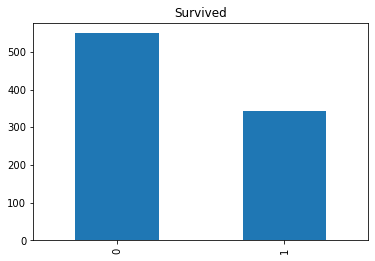

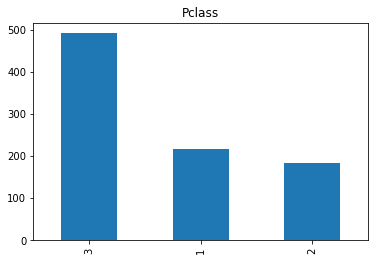

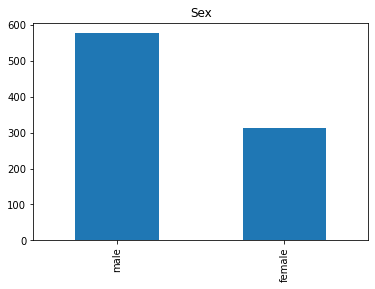

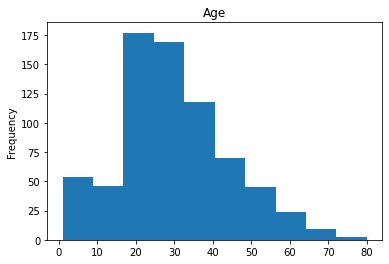

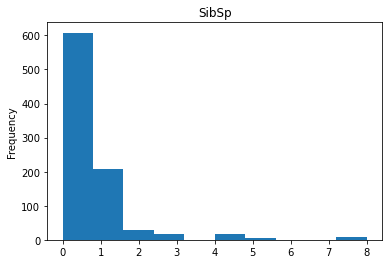

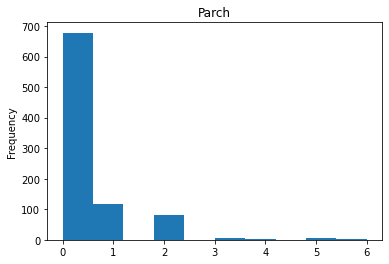

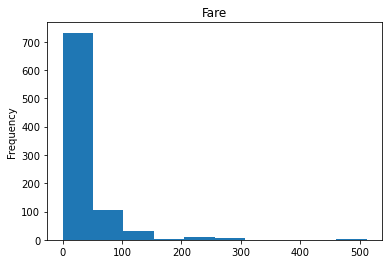

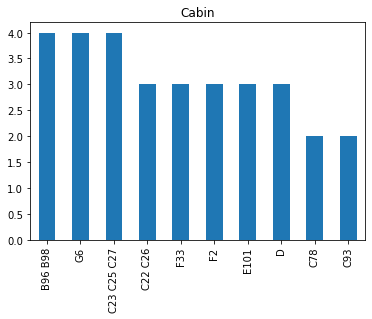

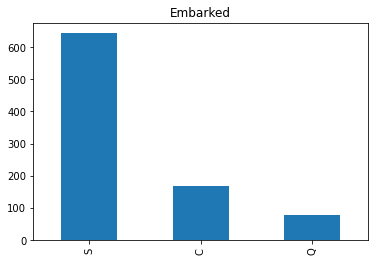

In [12]:
num_list = ['Age','SibSp','Parch','Fare']
cat_list = ['Survived','Pclass','Sex','Cabin','Embarked']
for column in df:
    plt.figure(column)
    plt.title(column)
    if column in num_list:
        df[column].plot(kind='hist')
    elif column in cat_list:
        df[column].value_counts()[:10].plot(kind='bar')
        
print('Numerical:',num_list)
print('Categorical:',cat_list)

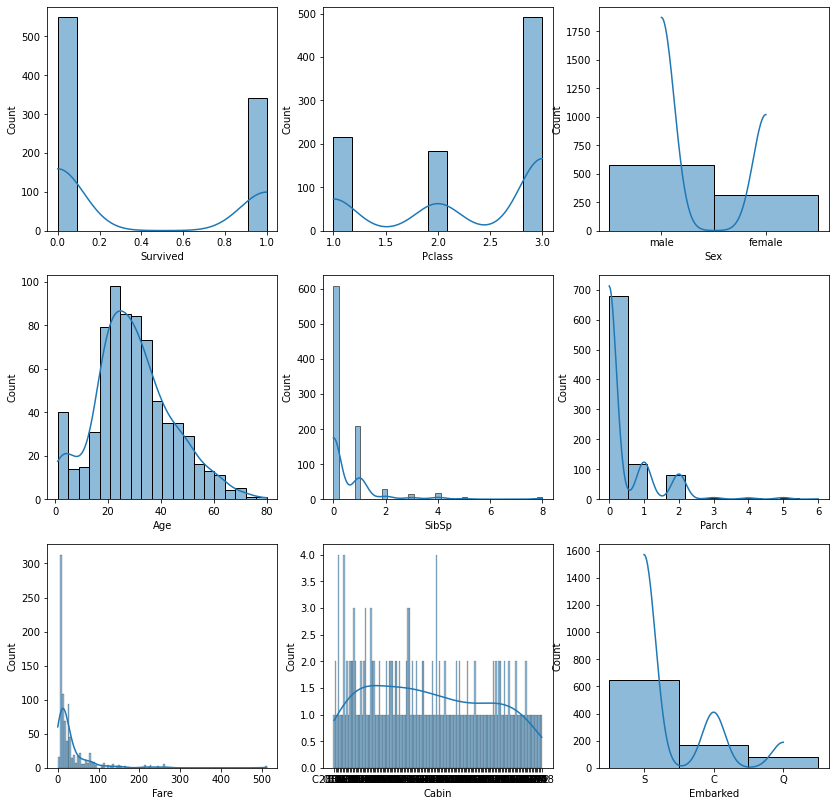

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(14,14))

for column in enumerate(df.columns):
        sns.histplot(data=df, x=column[1], kde=True, ax=axs[(column[0])//3, (column[0])%3])
    
plt.show()

##### Age distribution
We look at the age distribution subsets to gain information for treating the missing values issue.

In [14]:
age_female = df[(df['Sex']=='female')&(df['Age'].notnull())]['Age']
age_male = df[(df['Sex']=='male')&(df['Age'].notnull())]['Age']

[Text(0.5, 1.0, 'male')]

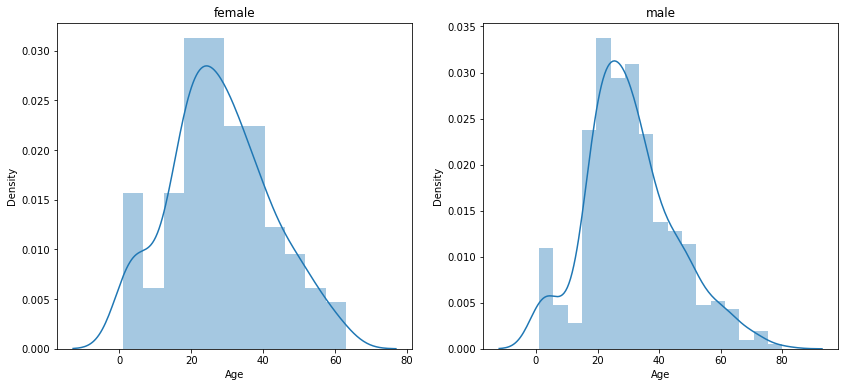

In [15]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(14, 6)

plot1 = sns.distplot(age_female, ax=axs[0])
plot1.set(title='female')

plot2 = sns.distplot(age_male, ax=axs[1])
plot2.set(title='male')

##### Outliers
Histogram plot of the age suggests the existence of outliers. However, the data points outside our boxplot bounderies are not distance enough to be justified as outliers.

[Text(0.5, 1.0, 'male')]

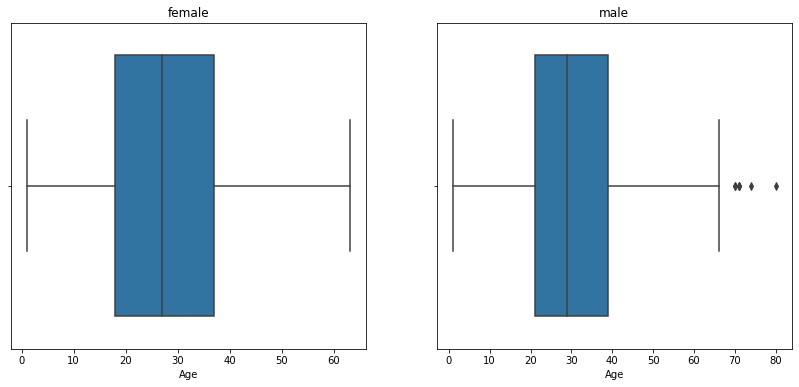

In [16]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(14, 6)

plot1 = sns.boxplot(age_female, ax=axs[0])
plot1.set(title='female')

plot2 = sns.boxplot(age_male, ax=axs[1])
plot2.set(title='male')

##### Missing Values
'Cabin' has too many missing values. So we will remove it for this project. 
Based on the skewed graph of 'Age' we choose median as the imputer. We also use mode for the 2 missing 'Cabin' values.

In [17]:
print('female age, median:',age_female.median())
print('male age, median:',age_male.median())
print('Embarked, mode:', df.mode()['Embarked'][0])

female age, median: 27.0
male age, median: 29.0
Embarked, mode: S


In [18]:
df['Embarked'].mode()

0    S
dtype: object

In [19]:
df_m = df.drop('Cabin',axis=1).copy(deep=True)
df_m.loc[(df['Sex']=='female')&(df['Age'].isnull()),'Age'] = age_female.median()
df_m.loc[(df['Sex']=='male')&(df['Age'].isnull()),'Age'] = age_male.median()
df_m.loc[(df['Embarked'].isnull()), 'Embarked'] = df.mode()['Embarked'][0]

In [20]:
df_m.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Correlations
We have both categorical and numeric features in our dataset. So instead of the usual correlation heatmap, we use a hybrid method implemented in a python package called 'dython'.<br>
http://shakedzy.xyz/dython/modules/nominal/<br>
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

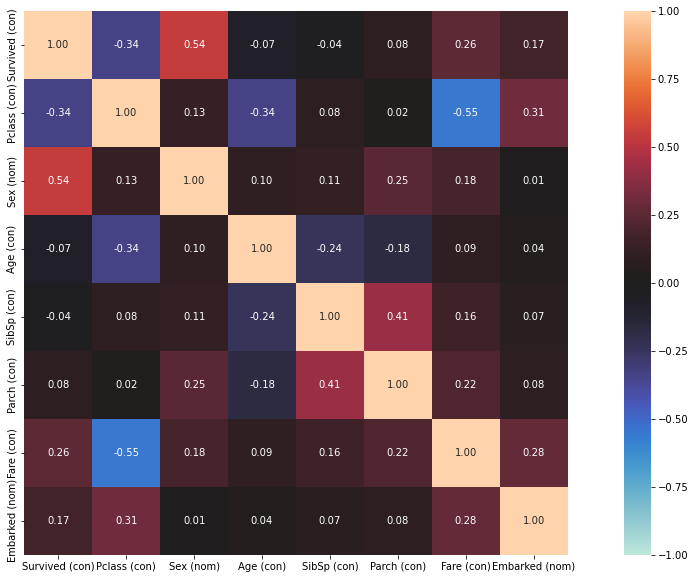

In [21]:
# http://shakedzy.xyz/dython/
nominal.associations(df_m,figsize=(20,10),mark_columns=True,nom_nom_assoc='theil');

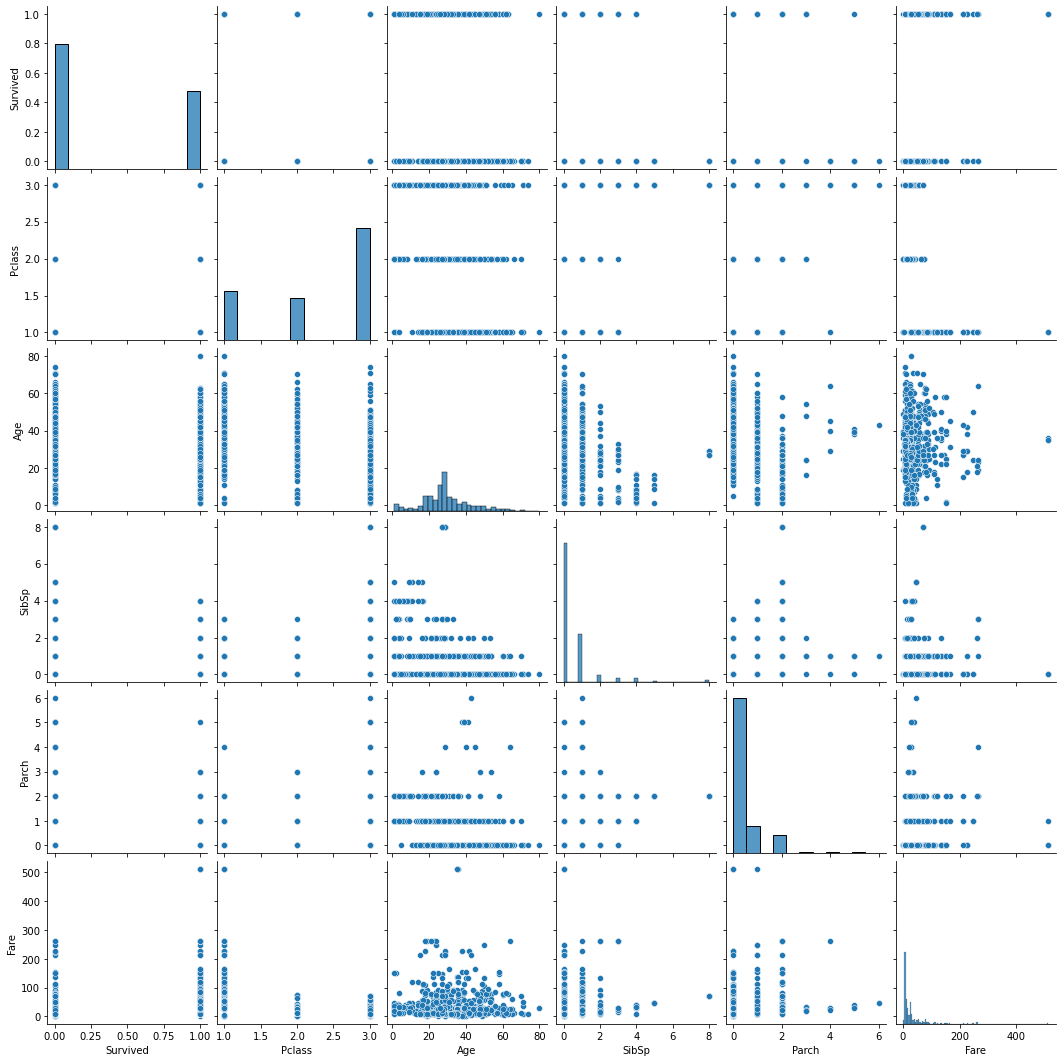

In [22]:
sns.pairplot(df_m)

#### Data Preparation for Logistic Regression
'Pclass', 'Sex' and 'Embarked' are the categorical variables that need to be converted to binary.

In [23]:
Pclass_dummies = pd.get_dummies(df_m['Pclass'], prefix='Pclass', drop_first=True)
Sex_dummies = pd.get_dummies(df_m['Sex'], prefix='Sex', drop_first=True)
Embarked_dummies = pd.get_dummies(df_m['Embarked'], prefix='Embarked', drop_first=True)

df_md = df_m.drop(['Pclass', 'Sex', 'Embarked'],1).copy(deep=True)
df_md = pd.concat([df_md,Pclass_dummies, Sex_dummies, Embarked_dummies],1)

In [24]:
df_md

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,1,0,1
887,1,19.0,0,0,30.0000,0,0,0,0,1
888,0,27.0,1,2,23.4500,0,1,0,0,1
889,1,26.0,0,0,30.0000,0,0,1,0,0


In [25]:
df_md['Survived'] = df_md['Survived'].astype('int')

### Train and Test Subsets
Note: The competiontion uses 'train' and 'test' for actually testing the models for the competion and 'test' dataset does not have the target column, 'Survived'. In this project we will only work on the train dataset and will break it into train and test subsets.

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_md.iloc[:,1:],df_md.iloc[:,0], test_size=0.3, random_state=0)

### Logistic Regression
In the frst step we perform the logistic regression on only one feature to stablish some results. What we would like to know is that how the ticket class of a passenger influenced whether they survived or not.

https://medium.com/@curryrowan/simplified-logistic-regression-classification-with-categorical-variables-in-python-1ce50c4b137

In [27]:
model = LogisticRegression(random_state=0).fit(x_train, y_train)

#### Feature Weights

In [28]:
coefs = pd.DataFrame(x_train.columns,columns=['feature']).copy()
coefs.insert(1,'Coef',model.coef_.transpose())
coefs

,feature,Coef
0,Age,-0.037452
1,SibSp,-0.366104
2,Parch,-0.097018
3,Fare,0.002852
4,Pclass_2,-0.590264
5,Pclass_3,-1.801207
6,Sex_male,-2.524309
7,Embarked_Q,0.058303
8,Embarked_S,-0.404622


In [29]:
model.intercept_

array([3.68019358])

<AxesSubplot:xlabel='Coef', ylabel='feature'>

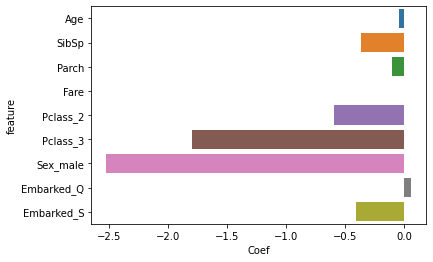

In [30]:
sns.barplot(x='Coef',y='feature',data=coefs)

In [31]:
y_pred = model.predict(x_test)

#### Model Evaluation

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       168
           1       0.76      0.72      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



### Normalizing Age

In [33]:
df_m['Age'].skew()
# https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de

0.4940716441389854

[Text(0.5, 1.0, 'Age')]

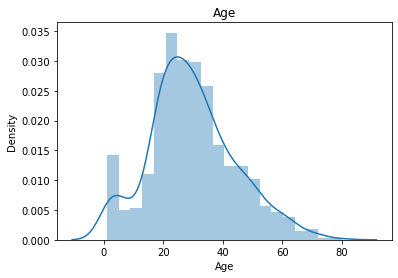

In [34]:
plot_age = sns.distplot(df['Age'])
plot_age.set(title='Age')

In [35]:
Age_log = np.log(df['Age'])

In [36]:
Age_log.skew()

-2.190045493032376

[Text(0.5, 1.0, 'Age Log')]

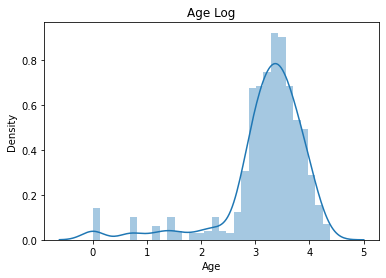

In [37]:
plot_age_log = sns.distplot(Age_log)
plot_age_log.set(title='Age Log')

In [38]:
Age_sqrt = np.sqrt(df['Age'])

In [39]:
Age_sqrt.skew()

-0.6449605633682791

[Text(0.5, 1.0, 'Age SQRT')]

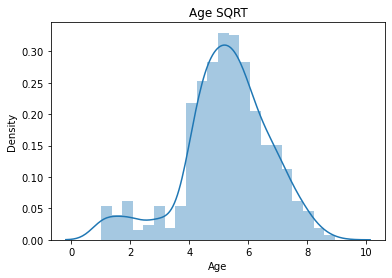

In [40]:
plot_age_sqrt = sns.distplot(Age_sqrt)
plot_age_sqrt.set(title='Age SQRT')

In [41]:
Age_boxcox = stats.boxcox(df['Age'])[0]

In [42]:
pd.Series(Age_boxcox).skew()

10.984836902840069

[Text(0.5, 1.0, 'Age Box-Cox')]

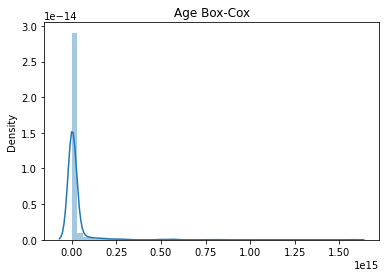

In [43]:
plot_age_boxcox = sns.distplot(Age_boxcox)
plot_age_boxcox.set(title='Age Box-Cox')

None of the above tranformation seem to improve the skewness of 'Age'

### With Categorical Age

In [44]:
Age_cat = pd.cut(df_m.Age,bins=[0,9,18,65,199],labels=['Child', 'Grown Child','Adult','Elderly'])
df_m.insert(3,'AgeGroup',Age_cat)

<AxesSubplot:xlabel='AgeGroup', ylabel='Count'>

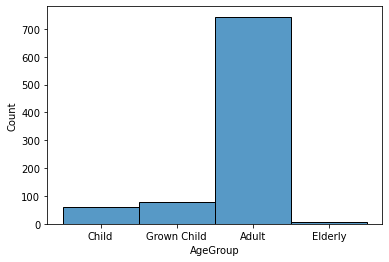

In [45]:
sns.histplot(df_m.AgeGroup)

In [46]:
Pclass_dummies = pd.get_dummies(df_m['Pclass'], prefix='Pclass', drop_first=True)
Age_dummies = pd.get_dummies(df_m['AgeGroup'], prefix='AgeGroup', drop_first=True)
Sex_dummies = pd.get_dummies(df_m['Sex'], prefix='Sex', drop_first=True)
Embarked_dummies = pd.get_dummies(df_m['Embarked'], prefix='Embarked', drop_first=True)

df_mc = df_m.drop(['Pclass', 'Age', 'AgeGroup', 'Sex', 'Embarked'],1).copy(deep=True)
df_mc = pd.concat([df_md,Pclass_dummies, Sex_dummies, Age_dummies, Embarked_dummies],1)

df_mc['Survived'] = df_mc['Survived'].astype('int')

x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(df_mc.iloc[:,1:],df_mc.iloc[:,0], test_size=0.3, random_state=0)

model_c = LogisticRegression(random_state=0).fit(x_train_c, y_train_c)

coefs_c = pd.DataFrame(x_train_c.columns,columns=['feature']).copy()
coefs_c.insert(1,'Coef',model_c.coef_.transpose())

y_pred_c = model_c.predict(x_test_c)

In [47]:
model_c.intercept_

array([4.15324501])

<AxesSubplot:xlabel='Coef', ylabel='feature'>

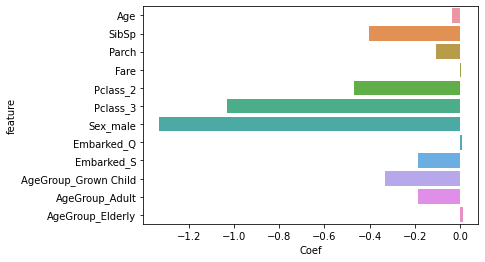

In [48]:
sns.barplot(x='Coef',y='feature',data=coefs_c)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       168
           1       0.76      0.72      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



### k-Fold Cross-Validation
https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/

In [63]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_k = LogisticRegression()
scores = cross_val_score(model_k, df_mc.iloc[:,1:],df_mc.iloc[:,0], scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.806 (0.035)
